In [1]:
import pandas as pd
u_data = pd.read_csv('ml-100k/u.data')
u_genre = pd.read_csv('ml-100k/u.genre')
u_info = pd.read_csv('ml-100k/u.info')
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
u_item = pd.read_csv("ml-100k/u.item", sep = '|', header = None, encoding = 'latin1', names = movie_header)
u_occupation = pd.read_csv('ml-100k/u.occupation')
u_user = pd.read_csv('ml-100k/u.user')


In [2]:
data_header = ["user_id", "item_id", "rating", "timestamp"]
data = pd.read_csv("ml-100k/u.data", sep = '\t', header = None, names=data_header)

In [3]:
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
item_id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
user_header = ["user_id", "age", "gender", "occupation", "zip_code"]
users = pd.read_csv("ml-100k/u.user", sep = '|', header = None, names=user_header)

In [6]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# pass in column names for each CSV
# 載入檔案
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# loading first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')
# create one merged DataFrame
# 算出前25個最多評分數量的電影
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

most_rated = lens.title.value_counts()[:25]
print(most_rated)

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Future (

In [17]:

# Get highest rated movies with at least 100 ratings
movieStats = lens.groupby('title').agg({'rating': [np.size, np.mean, np.std]})
atleast_100 = movieStats['rating']['size'] >= 100
movieStats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:25]
print(movieStats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:25])

most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]

plt.figure(1)

                                                   rating                    
                                                     size      mean       std
title                                                                        
Close Shave, A (1995)                                 112  4.491071  0.771047
Schindler's List (1993)                               298  4.466443  0.829109
Wrong Trousers, The (1993)                            118  4.466102  0.823607
Casablanca (1942)                                     243  4.456790  0.728114
Shawshank Redemption, The (1994)                      283  4.445230  0.767008
Rear Window (1954)                                    209  4.387560  0.712551
Usual Suspects, The (1995)                            267  4.385768  0.825500
Star Wars (1977)                                      583  4.358491  0.881341
12 Angry Men (1957)                                   125  4.344000  0.719588
Citizen Kane (1941)                                   198  4.292

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

0.7331066983316664
-0.168415196666575
      age_group
0         60-69
397       20-29
459       30-39
2773      50-59
2946      10-19
2976      40-49
61785     70-79
66934       0-9
          rating                    
            size      mean       std
age_group                           
0-9           43  3.767442  0.996116
10-19       8181  3.486126  1.170631
20-29      39535  3.467333  1.154236
30-39      25696  3.554444  1.118818
40-49      15021  3.591772  1.091876
50-59       8704  3.635800  1.042335
60-69       2623  3.648875  1.006390
70-79        197  3.649746  1.075783
None


<Figure size 432x288 with 0 Axes>

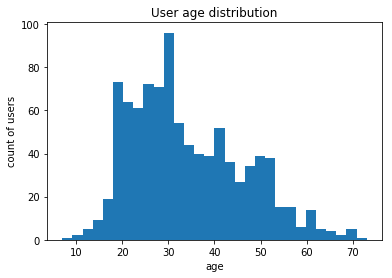

<Figure size 432x288 with 0 Axes>

In [10]:
users.age.plot.hist(bins=30)
plt.title("User age distribution")
plt.ylabel('count of users')
plt.xlabel('age')

print(lens.age.skew())
print(lens.age.kurtosis())


labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
print(lens[['age_group']].drop_duplicates()[:10])

print(lens.groupby('age_group').agg({'rating': [np.size, np.mean, np.std]}))
print(lens.index.name)

plt.figure(2)

<Figure size 432x288 with 0 Axes>

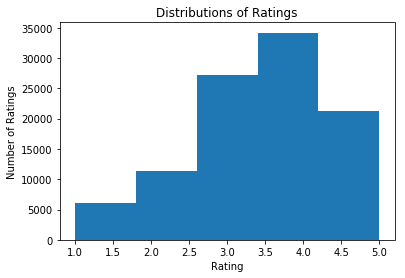

<Figure size 432x288 with 0 Axes>

In [11]:
lens.rating.plot.hist(bins=5)
plt.title('Distributions of Ratings')
plt.ylabel('Number of Ratings')
plt.xlabel('Rating')

plt.figure(3)

In [12]:
lens.rating.describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

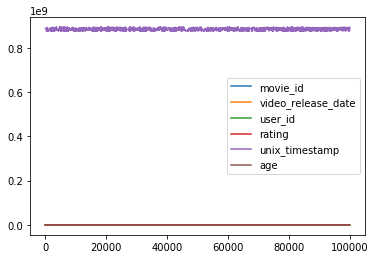

In [22]:
lens.plot()

sex
F    25740
M    74260
Name: sex, dtype: int64
sex                                F         M
movie_id title                                
1        Toy Story (1995)   3.789916  3.909910
2        GoldenEye (1995)   3.368421  3.178571
3        Four Rooms (1995)  2.687500  3.108108
4        Get Shorty (1995)  3.400000  3.591463
5        Copycat (1995)     3.772727  3.140625


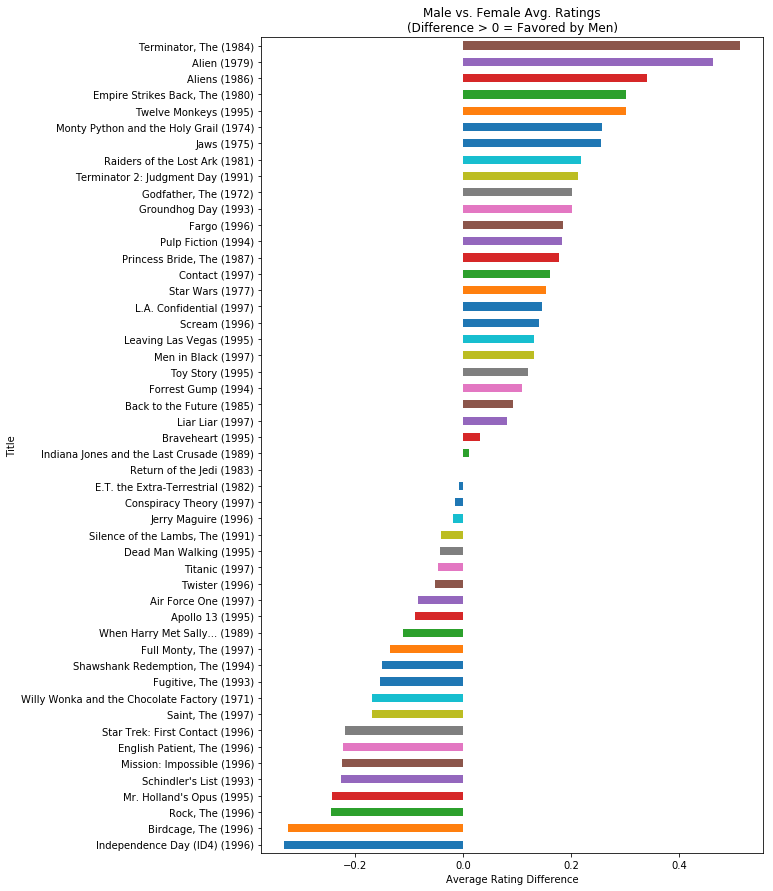

In [13]:
print(lens.groupby('sex').sex.count())

lens.reset_index()

pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)

print(pivoted.head())

pivoted['diff'] = pivoted.M - pivoted.F

pivoted.reset_index('movie_id', inplace=True)

disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference')

plt.show()

In [14]:
#展示數據分析工作
#展示推薦作品
# User based、Item based 比較
#以 ipynb 格式上傳帶有代碼和文本描述的報告（解釋您的觀察結果、解決方案、結果等）

In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
encoding='latin-1')

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
encoding='latin-1')

movie_ratings = pd.merge(movies, ratings)

#Dropping the columns that are not required
ratings.drop( "unix_timestamp", inplace = True, axis = 1 )
movies.drop(movies.columns[[3,4]], inplace = True, axis = 1 )

#Creating a pivot table with the following parameters
ratings_matrix = ratings.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True )

#Calculating Cosine Similiarities
movie_similarity = 1 - pairwise_distances( ratings_matrix.values, metric="cosine" )

#Filling diagonals with 0s instead of 1 to avoid recommending the same movie when sorting
np.fill_diagonal( movie_similarity, 0 )
ratings_matrix = pd.DataFrame( movie_similarity )

try:
    user_inp=input('input movie title: ')
    inp = movies[movies['title'] == user_inp].index.tolist()
    inp = inp[0]

    movies['similarity'] = ratings_matrix.iloc[inp]
    movies.columns = ['movie_id', 'title', 'release_date', 'similarity']
    print("Recommended movies based on your choice of ", user_inp, ": \n",
    movies.sort_values(["similarity"], ascending=False)[1:10])

except:
    print("Sorry, the movie is not in the database!")

input movie title: Michael (1996)
Recommended movies based on your choice of  Michael (1996) : 
       movie_id                                title release_date  similarity
1027      1028              Grumpier Old Men (1995)  01-Jan-1995    0.483718
120        121        Independence Day (ID4) (1996)  03-Jul-1996    0.476374
404        405           Mission: Impossible (1996)  22-May-1996    0.456456
110        111  Truth About Cats & Dogs, The (1996)  26-Apr-1996    0.452531
117        118                       Twister (1996)  10-May-1996    0.451377
475        476         First Wives Club, The (1996)  14-Sep-1996    0.448505
545        546                  Broken Arrow (1996)  09-Feb-1996    0.438120
844        845            That Thing You Do! (1996)  28-Sep-1996    0.431225
236        237                 Jerry Maguire (1996)  13-Dec-1996    0.430271


In [18]:
import collections
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Load relevant files into dataFrame
film = pd.read_csv('ml-100k/u.item', sep='|', encoding='ISO-8859-1')
film.columns = ['filmId', 'title', 'release date', 'video release date',
              'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
              'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama',
              'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
               'Sci-Fi', 'Thriller', 'War', 'Western']
columns = ['release date', 'video release date',
          'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
          'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama',
          'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
           'Sci-Fi', 'Thriller', 'War', 'Western']
film = film.drop(columns, axis=1)
print(film)
rating = pd.read_csv('ml-100k/u1.base', sep='\t', encoding='ISO-8859-1')
rating.columns = ['userId', 'filmId', 'rating', 'timestamp']
rating = rating.drop(['timestamp'], axis=1)

# Created a nested dictionary of each user with the filmIds and the ratings
# they provided
watched = collections.defaultdict(dict)
for i in rating.values.tolist():
    watched[i[0]][i[1]] = i[2]

# Create a pivot table with index as userId, columns as filmId, values as rating
rating_pivot = rating.pivot(index='userId', columns = 'filmId',\
                    values='rating').fillna(0)
# Convert the pivot table into a sparse matrix
rating_matrix = csr_matrix(rating_pivot.values)

# Initialise k nearest neighbours
knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn.fit(rating_matrix)

k = 17

while True:
    # Get user input for the user id
    user = int(input('User id:'))
    if user == -1: break
    user_index = user - 1

    # Find nearest neighbours
    distances, indices = knn.kneighbors(rating_pivot.iloc[user_index, :]\
                        .values.reshape(1, -1), n_neighbors = k)

    # Films the user has watched
    user_watched = set(watched[rating_pivot.index[user_index]])

    neighbours_watched = {}

    # Print neighbours and their distance from the user
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Closest users to user {}:\n'.format(rating_pivot.index[user_index]))

        else:
            print('{0}: {1} - distance: {2}'.format(i, rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

        neighbours_watched[rating_pivot.index[indices.flatten()[i]]] = watched[rating_pivot.index[indices.flatten()[i]]].copy()

        # Save information in order to calculate predicted rating
        for key, v in neighbours_watched[rating_pivot.index[indices.flatten()[i]]].items():
            neighbours_watched[rating_pivot.index[indices.flatten()[i]]][key] = [1 - distances.flatten()[i], v]
    print('----\n')

    unwatched_films = []
    for u in neighbours_watched:
        a = neighbours_watched[u].keys() - user_watched.intersection(neighbours_watched[u].keys())
        for f in a:
            unwatched_films.append(f)

    # Find unwatched films that are common among neighbours
    common_unwatched = [item for item, count in collections.Counter(unwatched_films).items() if count > 1]

    # Predict rating the user would give for the unwatched films
    common_unwatched_rating = []
    for f in common_unwatched:
        m = []
        w = []

        for u in neighbours_watched:
            if neighbours_watched[u].get(f) is not None:
                m.append(neighbours_watched[u].get(f)[0]*neighbours_watched[u].get(f)[1])
                w.append(neighbours_watched[u].get(f)[0])

        common_unwatched_rating.append([np.sum(m)/np.sum(w), f])
    common_unwatched_rating = sorted(common_unwatched_rating, reverse=True)

    print('10 best recommendations based on what similar users liked:\n')
    for f in common_unwatched_rating[:10]:
        print('{0} - {1} - {2:.2f}'.format(f[1], film.loc[film['filmId'] == f[1]]['title'].values[0], f[0]))
    print('-----\n')

      filmId                                              title
0          2                                   GoldenEye (1995)
1          3                                  Four Rooms (1995)
2          4                                  Get Shorty (1995)
3          5                                     Copycat (1995)
4          6  Shanghai Triad (Yao a yao yao dao waipo qiao) ...
5          7                              Twelve Monkeys (1995)
6          8                                        Babe (1995)
7          9                            Dead Man Walking (1995)
8         10                                 Richard III (1995)
9         11                               Seven (Se7en) (1995)
10        12                         Usual Suspects, The (1995)
11        13                            Mighty Aphrodite (1995)
12        14                                 Postino, Il (1994)
13        15                          Mr. Holland's Opus (1995)
14        16                 French Twis

In [17]:
from surprise import KNNBasic, Reader, Dataset
from surprise.model_selection import cross_validate, KFold

data = Dataset.load_from_file('ml-100k/u.data', reader= Reader())

model_user_based = KNNBasic(sim_options={'user_based': True})
model_user_based_results = cross_validate(model_user_based, data, measures=['RMSE'], cv=5, verbose=True)
print('User Base :', model_user_based_results, sep='\n')

model_item_based = KNNBasic(sim_options={'user_based': False})
model_item_based_results = cross_validate(model_item_based, data, measures=['RMSE'], cv=5, verbose=True)
print('Item Base :', model_user_based_results, sep='\n')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9756  0.9846  0.9750  0.9751  0.9829  0.9786  0.0042  
Fit time          0.33    0.33    0.34    0.34    0.34    0.34    0.01    
Test time         2.14    2.22    2.11    2.11    2.14    2.14    0.04    
User Base :
{'test_rmse': array([0.97555816, 0.98456261, 0.97500641, 0.975147  , 0.98286455]), 'fit_time': (0.32804226875305176, 0.3280520439147949, 0.3438074588775635, 0.34366679191589355, 0.3436717987060547), 'test_time': (2.142115831375122, 2.2210237979888916, 2.105467796325683

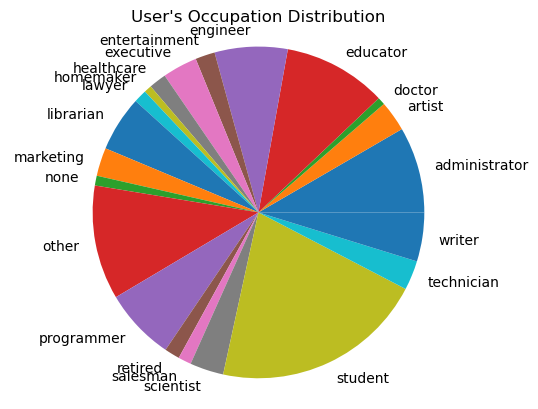

In [21]:
# occupation distrubution
occupation_count = users[["user_id", "occupation"]].groupby("occupation", as_index=False).size()  # count the numbers
plt.pie(occupation_count["size"], labels=occupation_count["occupation"])
plt.title("User's Occupation Distribution")
plt.axis("equal")
plt.show()